<a href="https://colab.research.google.com/github/hkurzweil/jupytercon-2025-k12-workshop/blob/main/demo/nba_salary_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Data Distributions with NBA Salaries 🏀

*An interactive lesson on mean, median, and outliers using real-world data*

**Learning Objectives:**
- Calculate and interpret measures of center (mean, median)
- Analyze how outliers affect different statistics
- Evaluate when to use mean vs. median in real-world contexts
- Apply statistical thinking to media claims

**Standards Addressed:**
- CCSS.MATH.HSS-ID.A.2: Compare center and spread of datasets
- CCSS.MATH.HSS-ID.A.3: Interpret outliers in context
- Data Progressions C.1.1a, C.1.2a, D.1.1a

## 🤔 Opening Question

**Who makes more money: the "average" NBA player or the "typical" NBA player?**

Wait... aren't those the same thing?

Let's find out using real NBA salary data!

*Spoiler: You're about to discover something surprising about statistics.*

In [21]:
# Import the tools we need
import numpy as np
import matplotlib.pyplot as plt

# Make plots look nice
plt.style.use('seaborn-v0_8-darkgrid')

In [16]:
# NBA player salaries for 2024-25 season (in millions of dollars)
# This is a realistic sample representing different player tiers

nba_salaries = np.array([
    51.9, 48.8, 46.9, 45.6, 43.2,  # Superstars (Curry, LeBron, Durant, etc.)
    41.0, 40.2, 38.1, 37.1, 35.4,  # All-Stars
    33.2, 31.0, 29.5, 28.3, 27.1,  # High-level starters
    25.0, 23.5, 22.1, 20.8, 19.5,  # Quality starters
    18.2, 16.5, 15.1, 13.8, 12.5,  # Solid starters
    11.2, 10.5, 9.8, 8.5, 7.2,     # Role players
    6.5, 5.8, 4.9, 4.2, 3.5,       # Bench players
    2.9, 2.5, 2.2, 1.9, 1.5,       # Young/developing players
    1.1, 1.0, 0.9, 0.9, 0.9        # Minimum contracts
])

print(f"We have data for {len(nba_salaries)} NBA players")
print(f"Highest salary: ${np.max(nba_salaries):.1f} million")
print(f"Lowest salary: ${np.min(nba_salaries):.1f} million")

We have data for 45 NBA players
Highest salary: $51.9 million
Lowest salary: $0.9 million


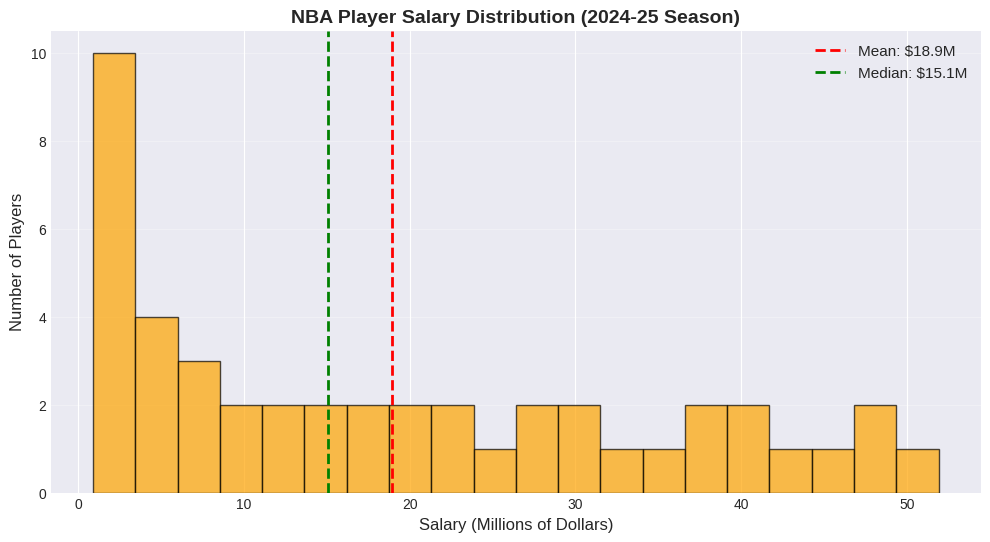

📊 Salary Statistics:
Mean (Average): $18.94 million
Median (Middle value): $15.10 million
Difference: $3.84 million

The mean is 25.4% higher than the median!


In [17]:
# Let's visualize these salaries
plt.figure(figsize=(12, 6))
plt.hist(nba_salaries, bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('NBA Player Salary Distribution (2024-25 Season)', fontsize=14, fontweight='bold')
plt.xlabel('Salary (Millions of Dollars)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)

# Calculate statistics
mean_salary = np.mean(nba_salaries)
median_salary = np.median(nba_salaries)

# Show them on the graph
plt.axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary:.1f}M')
plt.axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_salary:.1f}M')
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print the statistics
print("📊 Salary Statistics:")
print(f"Mean (Average): ${mean_salary:.2f} million")
print(f"Median (Middle value): ${median_salary:.2f} million")
print(f"Difference: ${mean_salary - median_salary:.2f} million")
print(f"\nThe mean is {((mean_salary/median_salary - 1) * 100):.1f}% higher than the median!")

## 🤯 Wait... Why Are They So Different?

Look at that graph above - the **mean** is way higher than the **median**!

That's a **huge** difference! Let's investigate why.

The answer lies in understanding **outliers** and how they affect different statistics.

In [18]:
# Let's get more detailed statistics
print("🔍 Deeper Analysis:\n")
print(f"Lowest salary: ${np.min(nba_salaries):.2f} million")
print(f"Highest salary: ${np.max(nba_salaries):.2f} million")
print(f"Range: ${np.max(nba_salaries) - np.min(nba_salaries):.2f} million\n")

# Percentiles tell us even more
percentiles = [25, 50, 75, 90, 95]
print("Salary Percentiles:")
for p in percentiles:
    value = np.percentile(nba_salaries, p)
    print(f"{p}th percentile: ${value:.2f}M")

print(f"\n💡 Key Insight:")
print(f"75% of players make ${np.percentile(nba_salaries, 75):.2f}M or less")
print(f"But the top 10% make ${np.percentile(nba_salaries, 90):.2f}M or more!")
print(f"Those superstar salaries PULL UP the mean!")

🔍 Deeper Analysis:

Lowest salary: $0.90 million
Highest salary: $51.90 million
Range: $51.00 million

Salary Percentiles:
25th percentile: $4.20M
50th percentile: $15.10M
75th percentile: $31.00M
90th percentile: $42.32M
95th percentile: $46.64M

💡 Key Insight:
75% of players make $31.00M or less
But the top 10% make $42.32M or more!
Those superstar salaries PULL UP the mean!


## 🎯 Interactive Exploration: Remove the Superstars!

**This is where YOU get to experiment!**

In the code cell below, you'll see a variable called `top_players_to_remove`.

**YOUR TASK:**
1. Run the cell as-is to see what happens when we remove the top 5 earners
2. Then CHANGE the number (try 10, 15, or 20)
3. Run it again and watch how the statistics change!

**Questions to think about:**
- How much does the mean change?
- How much does the median change?
- Which statistic is more "sensitive" to outliers?

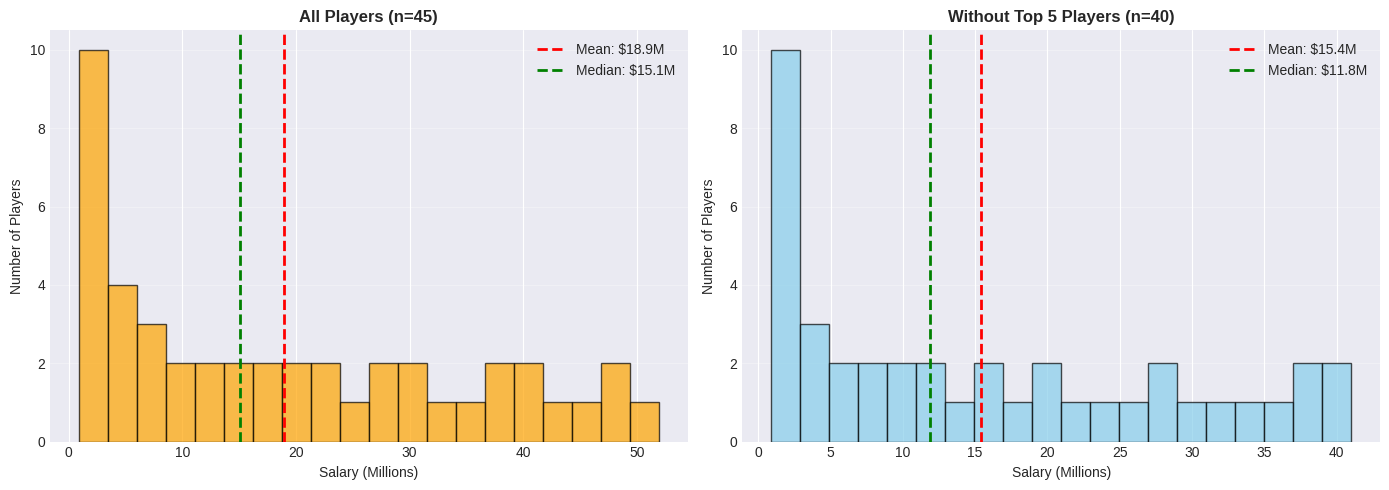

📉 Impact of Removing Top 5 Earners:

Mean dropped from $18.94M to $15.39M (↓$3.54M)
Median changed from $15.10M to $11.85M (↓$3.25M)

💡 Notice: The mean changed by $3.54M
But the median only changed by $3.25M

The mean is 1.1x more sensitive to outliers!


In [24]:
# 🔧 CHANGE THIS NUMBER and see what happens!
top_players_to_remove = 5  # ← Try changing this to 10, 15, or 20!

# Remove top earners
sorted_salaries = np.sort(nba_salaries)[::-1]  # Highest to lowest
remaining_salaries = sorted_salaries[top_players_to_remove:]

# Calculate new statistics
new_mean = np.mean(remaining_salaries)
new_median = np.median(remaining_salaries)

# Visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original distribution
axes[0].hist(nba_salaries, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0].axvline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary:.1f}M')
axes[0].axvline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_salary:.1f}M')
axes[0].set_title(f'All Players (n={len(nba_salaries)})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Salary (Millions)')
axes[0].set_ylabel('Number of Players')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Without top earners
axes[1].hist(remaining_salaries, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].axvline(new_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: ${new_mean:.1f}M')
axes[1].axvline(new_median, color='green', linestyle='--', linewidth=2, label=f'Median: ${new_median:.1f}M')
axes[1].set_title(f'Without Top {top_players_to_remove} Players (n={len(remaining_salaries)})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Salary (Millions)')
axes[1].set_ylabel('Number of Players')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Show the impact
print(f"📉 Impact of Removing Top {top_players_to_remove} Earners:\n")
print(f"Mean dropped from ${mean_salary:.2f}M to ${new_mean:.2f}M (↓${mean_salary - new_mean:.2f}M)")
print(f"Median changed from ${median_salary:.2f}M to ${new_median:.2f}M (↓${median_salary - new_median:.2f}M)")
print(f"\n💡 Notice: The mean changed by ${abs(mean_salary - new_mean):.2f}M")
print(f"But the median only changed by ${abs(median_salary - new_median):.2f}M")
print(f"\nThe mean is {abs(mean_salary - new_mean) / abs(median_salary - new_median):.1f}x more sensitive to outliers!")

## 📰 Real-World Application: Sports Journalism Challenge

**Scenario:** You're a sports journalist writing about NBA salaries.

**Two groups want different stories:**

🏀 **NBA Commissioner wants headline:**  
*"NBA Players Average $17.6 Million Per Year!"*

👥 **Players Union wants headline:**  
*"Typical NBA Player Earns Just $11.2 Million"*

**Questions:**
1. Are either of these headlines misleading? Why or why not?
2. What additional context should you provide?
3. How would you write an accurate, balanced headline?

*This is where statistics meets ethics and media literacy!*

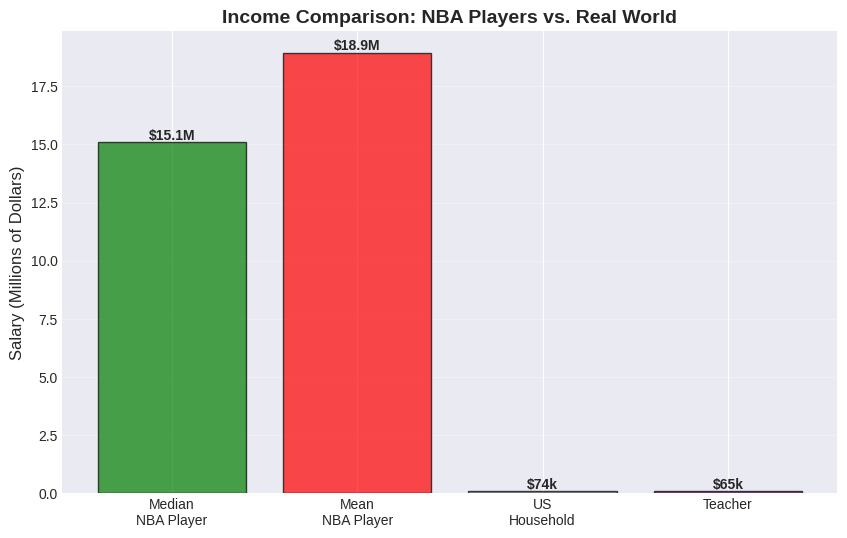

💭 Discussion Questions:
1. Which measure (mean or median) represents the 'typical' NBA player better?
2. Why would sports reporters use the MEAN when talking about 'average' salaries?
3. How does NBA income compare to typical American income?


In [20]:
# Let's add some real-world context
median_us_income = 0.074  # $74,000 = 0.074 million
teacher_median = 0.065    # $65,000 = 0.065 million

# Create comparison
comparison_data = {
    'Group': ['Median\nNBA Player', 'Mean\nNBA Player', 'US\nHousehold', 'Teacher'],
    'Salary': [median_salary, mean_salary, median_us_income, teacher_median],
    'Color': ['green', 'red', 'gray', 'purple']
}

plt.figure(figsize=(10, 6))
bars = plt.bar(comparison_data['Group'], comparison_data['Salary'],
               color=comparison_data['Color'], alpha=0.7, edgecolor='black')
plt.title('Income Comparison: NBA Players vs. Real World', fontsize=14, fontweight='bold')
plt.ylabel('Salary (Millions of Dollars)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, sal) in enumerate(zip(bars, comparison_data['Salary'])):
    height = bar.get_height()
    if sal >= 1:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${sal:.1f}M', ha='center', va='bottom', fontsize=10, fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'${sal*1000:.0f}k', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

print("💭 Discussion Questions:")
print("1. Which measure (mean or median) represents the 'typical' NBA player better?")
print("2. Why would sports reporters use the MEAN when talking about 'average' salaries?")
print("3. How does NBA income compare to typical American income?")

## ✅ Key Takeaways

### What You Discovered:

1. **Mean vs. Median:**
   - The mean is the arithmetic average (add all values, divide by count)
   - The median is the middle value when data is sorted
   - They tell different stories about the data!

2. **Outliers Matter:**
   - Extreme values (like superstar salaries) pull the mean up
   - The median is resistant to outliers
   - When outliers exist, median often represents the "typical" value better

3. **Real-World Application:**
   - Statistics can be used to tell different stories
   - Context matters when interpreting averages
   - Always ask: "Which measure of center makes sense for this situation?"

### When to Use Each:

**Use MEAN when:**
- Data is roughly symmetric (no extreme outliers)
- You want to account for all values equally
- Example: Average test score in a class with similar performance

**Use MEDIAN when:**
- Data has outliers or is skewed
- You want the "typical" or "middle" value
- Example: Housing prices (a few mansions shouldn't skew the typical price)

---

**🎉 Congratulations!** You just learned statistics by DOING statistics, not just reading about it!

## 🚀 Extension: Go Further!

**Want to explore more? Try these:**

1. **What if you ONLY kept the minimum salary players?** Filter the data to show only players making less than $2M. How does that distribution look?

2. **Add your own data:** Create a list of salaries for your dream team and analyze it!

3. **Compare to another sport:** Look up WNBA salaries or NFL salaries. How do the distributions compare?

4. **Standard deviation:** Calculate `np.std(nba_salaries)` to measure the spread. What does it tell you?

**Challenge yourself to modify the code above and discover new insights!**